Note: Most of the code was adapted from DR. Tony Diana's Data 602(Machine Learning) Notebooks

In [1]:
#installing lazypedict
!pip install lazypredict

In [2]:
#importing all packages
import pandas as pd
from pandas import DataFrame
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics, ensemble
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from math import sqrt
import lazypredict
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyRegressor
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.layers import Dense, Dropout, Activation 
from tensorflow.keras.models import Model, Sequential 
from tensorflow.keras.optimizers import Adam
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import ExtraTreesRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
all_df = pd.read_csv('/content/drive/Shareddrives/DATA 602 Final Project/NATIONAL_GRAD_FINANCE_RACE_CLEAN.csv', error_bad_lines= False)

In [5]:
#creating dataframe for NY
ny_df = pd.read_csv('/content/drive/Shareddrives/DATA 602 Final Project/NY_GRAD_FINANCE_RACE_CLEAN.csv')
ny_df.head()

,Unnamed: 0,NCESSCH,TITLEI,LEAID,G12,SCHOOL_LEVEL,TOTFRL,FTE,STUTERATIO,TOTMENROL,TOTFENROL,PCT_MEN,PCT_FEN,PCT_FRL,SCHOOL_TYPE,STNAM,FIPST,ALL_RATE,ALL_COHORT,MAM_COHORT,MAS_COHORT,MBL_COHORT,MHI_COHORT,MTR_COHORT,MWH_COHORT,CWD_COHORT,ECD_COHORT,FCS_COHORT,HOM_COHORT,LEP_COHORT,Success_Rate,PPCSTOT,MATH_NUM,MATH_PCT,READ_NUM,READ_PCT
0,10560,361938005859,Not Applicable,3619380,84.00,High,85,27.02,11.40,133.00,175.00,0.43,0.43,0.28,1,NEW YORK,36,95.00,78,0.00,1.00,2.00,7.00,3.00,65.00,12.00,25.00,0.00,0.00,0.00,1,28407,40.50,95.00,50.59,95.00
1,10561,360585005857,Yes,3605850,135.00,High,585,51.01,14.30,364.00,366.00,0.50,0.50,0.80,1,NEW YORK,36,50.00,152,3.00,7.00,123.00,12.00,2.00,5.00,34.00,121.00,0.00,5.00,11.00,0,21573,40.50,70.00,50.59,70.00
2,10562,360585000297,Yes,3605850,120.00,High,434,67.02,10.80,219.00,505.00,0.30,0.30,0.60,1,NEW YORK,36,90.00,102,1.00,1.00,63.00,13.00,2.00,22.00,11.00,53.00,0.00,6.00,0.00,1,21573,40.50,75.00,50.59,80.00
3,10563,360585000301,Yes,3605850,110.00,High,396,47.01,10.50,331.00,163.00,0.67,0.67,0.80,0,NEW YORK,36,45.00,143,1.00,7.00,107.00,14.00,3.00,11.00,32.00,111.00,0.00,7.00,5.00,0,21573,40.50,80.00,50.59,65.00
4,10564,360585000307,Yes,3605850,97.00,High,400,47.00,10.20,160.00,320.00,0.33,0.33,0.83,1,NEW YORK,36,80.00,104,0.00,1.00,66.00,14.00,2.00,21.00,27.00,78.00,0.00,2.00,2.00,1,21573,40.50,85.00,50.59,85.00


In [7]:
#creating dataframe for DMV
dmv_df = pd.read_csv('/content/drive/Shareddrives/DATA 602 Final Project/DMV_GRAD_FINANCE_RACE_CLEAN.csv')
dmv_df.head()

,Unnamed: 0,NCESSCH,TITLEI,LEAID,G12,SCHOOL_LEVEL,TOTFRL,FTE,STUTERATIO,TOTMENROL,TOTFENROL,PCT_MEN,PCT_FEN,PCT_FRL,SCHOOL_TYPE,STNAM,FIPST,ALL_RATE,ALL_COHORT,MAM_COHORT,MAS_COHORT,MBL_COHORT,MHI_COHORT,MTR_COHORT,MWH_COHORT,CWD_COHORT,ECD_COHORT,FCS_COHORT,HOM_COHORT,LEP_COHORT,Success_Rate,PPCSTOT,MATH_NUM,MATH_PCT,READ_NUM,READ_PCT
0,3268,110003000264,Not Applicable,1100030,85.00,High,-1,21.74,19.60,254.00,172.00,0.60,0.60,0.00,0,DISTRICT OF COLUMBIA,11,6.00,169,0.00,0.00,80.00,88.00,1.00,0.00,36.00,158.00,9.00,21.00,77.00,0,22406,24.00,20.00,19.00,20.00
1,3269,110003000267,Not Applicable,1100030,139.00,High,-1,43.50,14.60,267.00,366.00,0.42,0.42,0.00,1,DISTRICT OF COLUMBIA,11,95.00,143,2.00,3.00,122.00,14.00,2.00,0.00,9.00,57.00,2.00,6.00,5.00,1,22406,185.00,30.00,171.00,65.00
2,3270,110003000008,Not Applicable,1100030,112.00,High,-1,60.00,10.80,375.00,270.00,0.58,0.58,0.00,1,DISTRICT OF COLUMBIA,11,60.00,164,0.00,1.00,84.00,77.00,1.00,1.00,29.00,126.00,9.00,26.00,59.00,0,22406,139.00,5.00,136.00,6.00
3,3271,110003000016,Not Applicable,1100030,110.00,High,-1,4.00,136.30,171.00,374.00,0.31,0.31,0.00,1,DISTRICT OF COLUMBIA,11,95.00,114,0.00,4.00,86.00,13.00,2.00,9.00,15.00,44.00,4.00,5.00,1.00,1,22406,145.00,15.00,141.00,55.00
4,3272,110003000055,Not Applicable,1100030,136.00,High,-1,47.00,9.70,268.00,187.00,0.59,0.59,0.00,1,DISTRICT OF COLUMBIA,11,65.00,180,0.00,0.00,174.00,6.00,0.00,0.00,36.00,137.00,12.00,15.00,1.00,0,22406,98.00,6.00,94.00,15.00


In [8]:
#dropping columns that won't be used for modeling
ny_df.drop(['TITLEI', 'Unnamed: 0','NCESSCH','LEAID','G12', 'SCHOOL_LEVEL','STNAM', 'PCT_MEN', 'PCT_FEN', 'PCT_FRL','FIPST','CWD_COHORT', 'ECD_COHORT', 'FCS_COHORT', 'HOM_COHORT', 'LEP_COHORT'],axis=1, inplace= True)

In [9]:
#dropping columns that won't be used for modeling
dmv_df.drop(['TITLEI', 'Unnamed: 0','NCESSCH','LEAID','G12','SCHOOL_LEVEL','STNAM','PCT_MEN', 'PCT_FEN', 'PCT_FRL','FIPST','CWD_COHORT', 'ECD_COHORT', 'FCS_COHORT', 'HOM_COHORT', 'LEP_COHORT'],axis=1, inplace= True)

In [10]:
#checking for nulls in NY dataframe
ny_df.isnull().sum()

TOTFRL          0
FTE             0
STUTERATIO      2
TOTMENROL       0
TOTFENROL       0
SCHOOL_TYPE     0
ALL_RATE        0
ALL_COHORT      0
MAM_COHORT      0
MAS_COHORT      0
MBL_COHORT      0
MHI_COHORT      0
MTR_COHORT      0
MWH_COHORT      0
Success_Rate    0
PPCSTOT         0
MATH_NUM        0
MATH_PCT        0
READ_NUM        0
READ_PCT        0
dtype: int64

In [11]:
#dropping nulls in NY dataframe
ny_df.dropna(inplace=True)

In [12]:
#checking for nulls in DMV dataframe
dmv_df.isnull().sum()

TOTFRL          0
FTE             0
STUTERATIO      8
TOTMENROL       2
TOTFENROL       1
SCHOOL_TYPE     0
ALL_RATE        0
ALL_COHORT      0
MAM_COHORT      0
MAS_COHORT      0
MBL_COHORT      0
MHI_COHORT      0
MTR_COHORT      0
MWH_COHORT      0
Success_Rate    0
PPCSTOT         0
MATH_NUM        0
MATH_PCT        0
READ_NUM        0
READ_PCT        0
dtype: int64

In [13]:
#dropping nulls in DMV dataframe
dmv_df.dropna(inplace=True)

**Correlation Matrix**

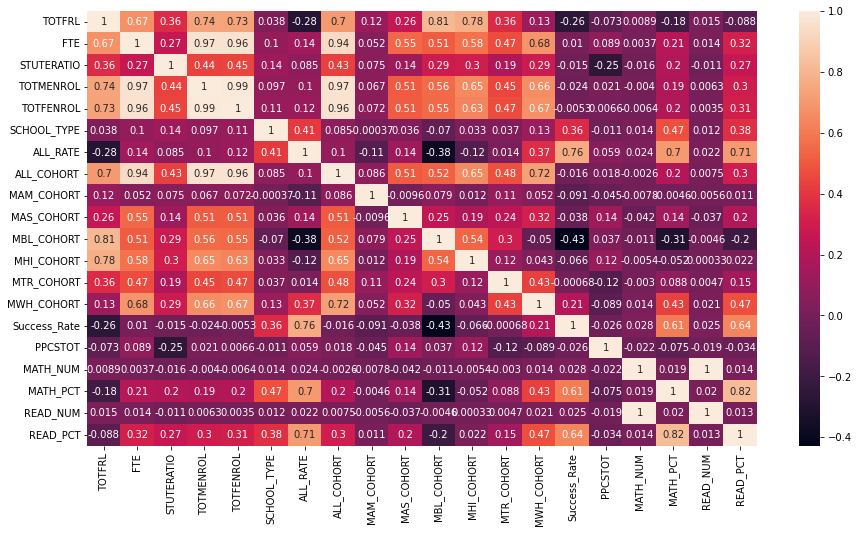

In [14]:
#creating correlation matrix for NY
plt.figure(figsize = (15,8))
corrMatrix = ny_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

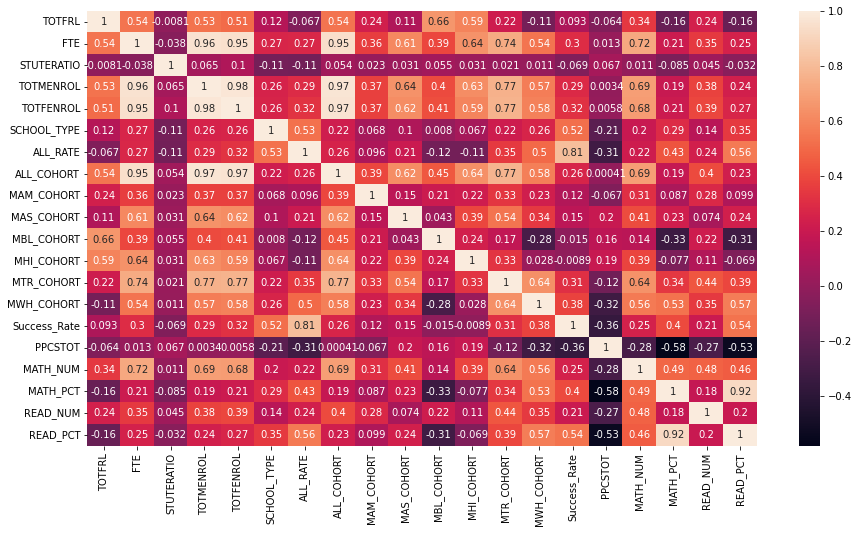

In [15]:
#creating correlation matrix for DMV
plt.figure(figsize = (15,8))
corrMatrix = dmv_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [16]:
#dropping binary success rate for regression df
ny_regression = ny_df.drop(['Success_Rate'], axis=1)

In [17]:
#dropping continuous all rate for classification df
ny_classification = ny_df.drop(['ALL_RATE'], axis=1)

In [18]:
#dropping binary success rate for regression df
dmv_regression = dmv_df.drop(['Success_Rate'], axis=1)

In [19]:
#dropping continuous all rate for classification df
dmv_classification = dmv_df.drop(['ALL_RATE'], axis=1)

**STATS**

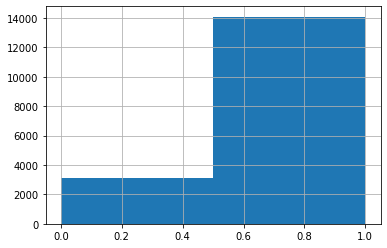

In [20]:
#distribution of target variable for entire U.S.
all_df['Success_Rate'].hist(bins =2)

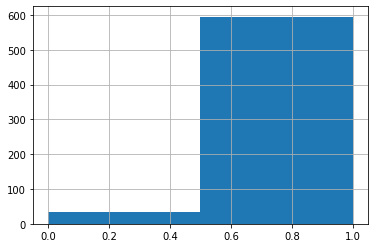

In [21]:
#distribution of target variable for NY
ny_classification['Success_Rate'].hist(bins =2)

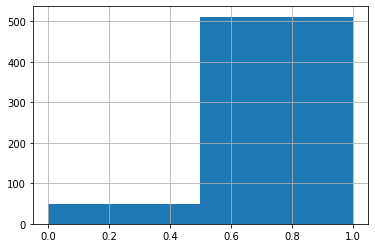

In [22]:
#distribution of target variable for DMV
dmv_classification['Success_Rate'].hist(bins =2)

In [23]:
#average grad rate per region
m1 = np.mean(ny_regression['ALL_RATE'])
print("Average NY grad rate:", m1)

m2 = np.mean(dmv_regression['ALL_RATE'])
print("Average DMV grad rate:", m2)

Average NY grad rate: 87.03980891719745
Average DMV grad rate: 84.4884156630634


**Using Lazy Predict on NY Data to find the best Models**

**Lazy Regressor**

In [24]:
#creating y variable with all rate
y_reg = ny_regression.pop('ALL_RATE')
y_reg=y_reg.astype('int')
print(y_reg)

0      95
1      50
2      90
3      45
4      80
       ..
625    76
626    80
627    80
628    75
629    80
Name: ALL_RATE, Length: 628, dtype: int64


In [25]:
#creating x variable with the other values in the NY regression dataframe
X_reg = ny_regression.values
X_reg.shape
print(X_reg)

[[ 85.          27.02000046  11.4        ...  95.          50.59406569
   95.        ]
 [585.          51.00999832  14.3        ...  70.          50.59406569
   70.        ]
 [434.          67.01999664  10.8        ...  75.          50.59406569
   80.        ]
 ...
 [159.          27.01000023  10.6        ...  90.          50.59406569
   90.        ]
 [382.          49.02999878  12.5        ...  90.          50.59406569
   90.        ]
 [ 93.          23.85000038   7.5        ...  80.          50.59406569
   80.        ]]


In [26]:
#split the test and train data 70/30
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size= 0.3, random_state=42)

In [27]:
#initialize the lazyregressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

In [28]:
#fit the data
models, predictions = reg.fit(X_reg_train, X_reg_test, y_reg_train, y_reg_test)

100%|██████████| 42/42 [00:04<00:00, 10.02it/s]


In [29]:
#visualize the results in the form of a dataframe
data=pd.DataFrame(models)
data

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
BayesianRidge,0.46,0.52,9.52,0.01
RidgeCV,0.46,0.52,9.52,0.02
ElasticNetCV,0.46,0.51,9.53,0.10
Ridge,0.46,0.51,9.53,0.01
TransformedTargetRegressor,0.46,0.51,9.53,0.01
LinearRegression,0.46,0.51,9.53,0.02
LinearSVR,0.46,0.51,9.53,0.02
LassoCV,0.46,0.51,9.55,0.12
LassoLarsCV,0.46,0.51,9.55,0.07


**Lazy Classifier**

In [30]:
#creating the y variable using success rate
y_clf = ny_classification.pop('Success_Rate')
y_clf=y_clf.astype('int')
print(y_clf)

0      1
1      0
2      1
3      0
4      1
      ..
625    1
626    1
627    1
628    1
629    1
Name: Success_Rate, Length: 628, dtype: int64


In [31]:
#creating the x variable using the other values in NY classification dataframe
X_clf = ny_classification.values
X_clf.shape

(628, 18)

In [32]:
#split the data 70/30
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size= 0.3, random_state=42)

In [33]:
#initialize lazyclassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)

In [34]:
#fit the data
models,predictions = clf.fit(X_clf_train, X_clf_test, y_clf_train, y_clf_test)

100%|██████████| 29/29 [00:01<00:00, 23.27it/s]


In [35]:
#visualize the results
data= pd.DataFrame(models)
data

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.97,0.91,0.91,0.97,0.14
LinearDiscriminantAnalysis,0.97,0.91,0.91,0.97,0.03
NearestCentroid,0.95,0.89,0.89,0.95,0.02
RandomForestClassifier,0.98,0.87,0.87,0.98,0.21
XGBClassifier,0.97,0.87,0.87,0.97,0.07
LinearSVC,0.97,0.87,0.87,0.97,0.03
LGBMClassifier,0.97,0.87,0.87,0.97,0.09
DecisionTreeClassifier,0.97,0.87,0.87,0.97,0.02
QuadraticDiscriminantAnalysis,0.89,0.87,0.87,0.91,0.02


In [36]:
#get feature names to use later
feature_names = ny_classification.columns
print(feature_names)

Index(['TOTFRL', 'FTE', 'STUTERATIO', 'TOTMENROL', 'TOTFENROL', 'SCHOOL_TYPE',
       'ALL_COHORT', 'MAM_COHORT', 'MAS_COHORT', 'MBL_COHORT', 'MHI_COHORT',
       'MTR_COHORT', 'MWH_COHORT', 'PPCSTOT', 'MATH_NUM', 'MATH_PCT',
       'READ_NUM', 'READ_PCT'],
      dtype='object')


**NY Regression**

**Gradient Boosting Regressor**

In [37]:
#use y and x from the regression variables
y = y_reg
X = X_reg

In [38]:
#split the data and assign parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,}

In [39]:
#initialize, fit and predict 
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

pred = reg.predict(X_test)

In [40]:
#get score for training data
print(reg.score(X_train, y_train))

0.9189765164625932


In [41]:
#get score for testing data
print(reg.score(X_test, y_test))

0.4582571658844242


Since the score is better for training than testing, the model is overfitting. It can be improved with cross validation or regularization.

**NY Classification**

**LinearSVC**

In [42]:
#set x and y as classification variables
y = y_clf
X = X_clf

In [43]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [44]:
#initialize, fit and predict
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

#generate classification report
print("Classification Report:\n", classification_report(y_test, pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.98      0.98      0.98       177

    accuracy                           0.97       189
   macro avg       0.87      0.87      0.87       189
weighted avg       0.97      0.97      0.97       189



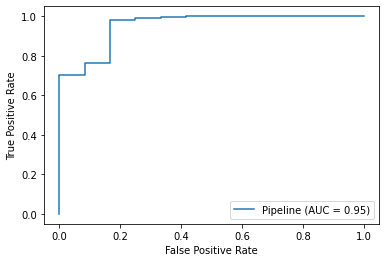

In [45]:
#generate ROC curve
metrics.plot_roc_curve(clf, X_test, y_test) 

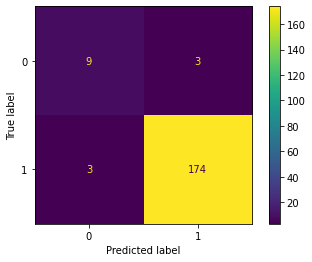

In [46]:
#plot comfusion matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

**Random Forest**

In [47]:
#initialize, fit and train
clf = RandomForestClassifier(n_estimators=500, n_jobs=4)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [48]:
#generate classification report
print("Classification Report:\n", classification_report(y_test, pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.98      0.99      0.99       177

    accuracy                           0.97       189
   macro avg       0.93      0.83      0.87       189
weighted avg       0.97      0.97      0.97       189



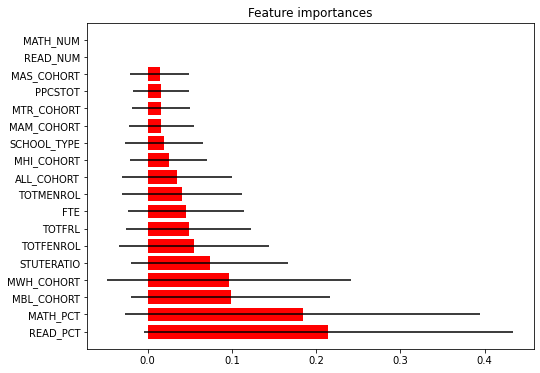

In [49]:
#plot feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)

plt.figure(figsize =(8,6))
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")

plt.yticks(range(X.shape[1]), [feature_names[i] for i in indices])
plt.ylim([-1, X.shape[1]])
plt.show()



**Logistic Regression**

In [50]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
pred = grid_result.predict(X_test)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.976445 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.969644 (0.019858) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.966579 (0.021779) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.965821 (0.023351) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.969626 (0.021629) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.967354 (0.022492) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.965839 (0.021761) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.969609 (0.021623) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.966596 (0.020944) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.966561 (0.020207) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.971124 (0.018598) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.967354 (0.023245) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.967354 (0.020905) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.976445 (0.019041) wi

In [51]:
#generate classification report
print('Classification Report: \n',classification_report(y_test, pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.98      0.98      0.98       177

    accuracy                           0.96       189
   macro avg       0.84      0.86      0.85       189
weighted avg       0.96      0.96      0.96       189



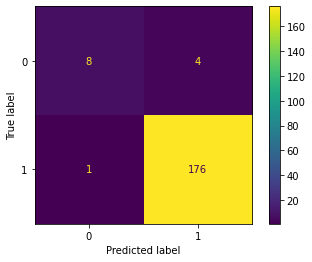

In [52]:
#plot confusion matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

**Lasso and Ridge**

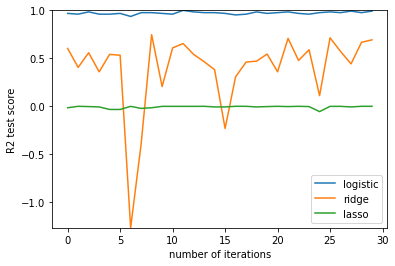

In [53]:
#creating function for lasso, ridge, and logistic regression
def model_experiment(num_iter = 5, 
                     models = ['logistic', 'ridge', 'lasso'], alpha= 10, 
                     complexity = 'simple', degree = 3):
    
    x_axis = np.arange(num_iter)
    y_logistic_test = []
    y_lasso_test = []
    y_ridge_test = []
    sample_models = {}
    for i in range(num_iter):  
        if complexity == 'simple':
            ## split train_test 
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        elif complexity == 'polynomial':
            ## Create higher order terms
            poly = PolynomialFeatures(degree=degree)
            Xp = poly.fit_transform(X)
            ## test-train split
            X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size = 0.2)

        ## Standard scale mean = 0, variance = 1
        sd = StandardScaler()

        sd.fit(X_train)

        X_train = sd.transform(X_train)

        X_test = sd.transform(X_test)

        ## Vanilla model
        if 'logistic' in models:
            logistic = LogisticRegression()
            logistic.fit(X_train, y_train)
            sample_models['logistic'] = logistic
            test_score = logistic.score(X_test, y_test)
            train_score = logistic.score(X_train, y_train)
            y_logistic_test.append(test_score)

        if 'ridge' in models:
            ## Ridge in the simple setting
            ridge = Ridge(alpha = alpha, max_iter= 10000)
            ridge.fit(X_train, y_train)
            sample_models['ridge'] = ridge
            y_ridge_test.append(ridge.score(X_test, y_test))

        if 'lasso' in models:
            ## Lasso in the simple setting
            lasso = Lasso(alpha = alpha, max_iter= 10000)
            lasso.fit(X_train, y_train)           
            sample_models['lasso'] = lasso           
            y_lasso_test.append(lasso.score(X_test, y_test))

        i+=1
    if 'logistic' in models:
        plt.plot(y_logistic_test, label = 'logistic')
    if 'ridge' in models:
        plt.plot(y_ridge_test, label = 'ridge')
    if 'lasso' in models:
        plt.plot(y_lasso_test, label = 'lasso')
    plt.ylabel('R2 test score')
    plt.xlabel('number of iterations')
    all_results = y_logistic_test + y_lasso_test + y_ridge_test
    plt.ylim((np.min(all_results), np.max(all_results)))
    
    plt.legend()
    return sample_models

trained_models = model_experiment(num_iter=30, alpha = 15,
                                   models = ['logistic', 'ridge', 'lasso'], 
                                   complexity= 'polynomial', degree = 2)

**Neural Networks**

In [54]:
#scale the data
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [55]:
# Create the Neural Network
def create_model(learning_rate, dropout_rate): 
  model = Sequential() 
  model.add(Dense(12, input_dim=X_train.shape[1], activation='relu')) 
  model.add(Dropout(dropout_rate)) 
  model.add(Dense(6, activation='relu')) 
  model.add(Dropout(dropout_rate)) 
  model.add(Dense(1, activation='sigmoid')) 
  adam = Adam(lr=learning_rate) 
  model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
  return model


In [56]:
#set values for dropout_rate, epochs, batch_size, and learn_rate
dropout_rate = 0.1 
epochs = 50 
batch_size = 1 
learn_rate = 0.001

In [57]:
#call the neural network function
model = create_model(learn_rate, dropout_rate) 

In [58]:
#visualize the model history of the neural network
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

Epoch 1/50
351/351 [==============================] - 3s 5ms/step - loss: 0.4409 - accuracy: 0.9003 - val_loss: 0.2593 - val_accuracy: 0.9432
Epoch 2/50
351/351 [==============================] - 1s 2ms/step - loss: 0.1933 - accuracy: 0.9715 - val_loss: 0.1584 - val_accuracy: 0.9545
Epoch 3/50
351/351 [==============================] - 1s 2ms/step - loss: 0.1283 - accuracy: 0.9658 - val_loss: 0.1112 - val_accuracy: 0.9773
Epoch 4/50
351/351 [==============================] - 1s 2ms/step - loss: 0.1077 - accuracy: 0.9744 - val_loss: 0.0884 - val_accuracy: 0.9886
Epoch 5/50
351/351 [==============================] - 1s 2ms/step - loss: 0.1018 - accuracy: 0.9744 - val_loss: 0.0866 - val_accuracy: 0.9886
Epoch 6/50
351/351 [==============================] - 1s 2ms/step - loss: 0.0799 - accuracy: 0.9801 - val_loss: 0.0855 - val_accuracy: 0.9886
Epoch 7/50
351/351 [==============================] - 1s 2ms/step - loss: 0.0528 - accuracy: 0.9943 - val_loss: 0.0834 - val_accuracy: 0.9886
Epoch 

In [59]:
#get the loss and accuracies
accuracies = model.evaluate(X_test, y_test, verbose=1) 
print('Test Score:', accuracies[0]) 
print('Test Accuracy:', accuracies[1])

6/6 [==============================] - 0s 3ms/step - loss: 0.5843 - accuracy: 0.9577
Test Score: 0.5843433141708374
Test Accuracy: 0.9576719403266907


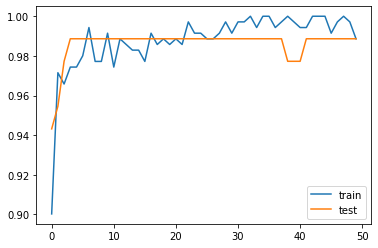

In [60]:
#plot accuracy for test and train data from the model history
plt.plot(model_history.history['accuracy'], label = 'accuracy') 
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy') 
plt.legend(['train', 'test'])

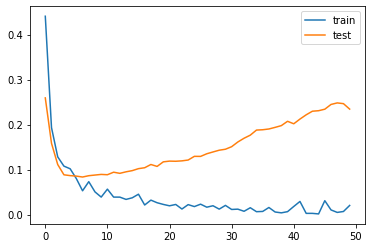

In [61]:
#plot loss for test and train data from the model history
plt.plot(model_history.history['loss'], label = 'loss') 
plt.plot(model_history.history['val_loss'], label = 'val_loss') 
plt.legend(['train','test'])

**Unsupervised Learning** Clustering for NY

In [62]:
# Scaling the data so that all the features become comparable 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

In [63]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

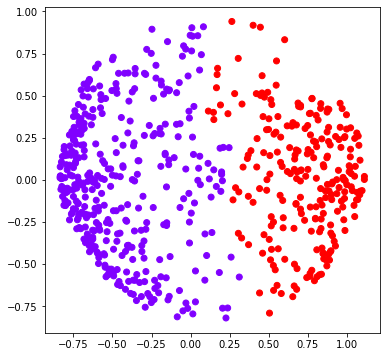

In [64]:
ac2 = AgglomerativeClustering(n_clusters = 2) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = ac2.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

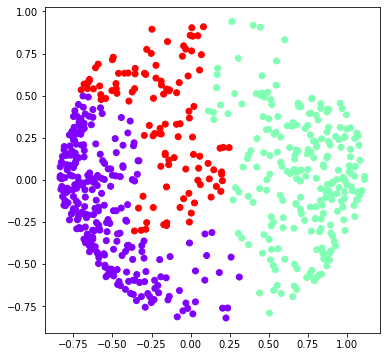

In [65]:
ac3 = AgglomerativeClustering(n_clusters = 3) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac3.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

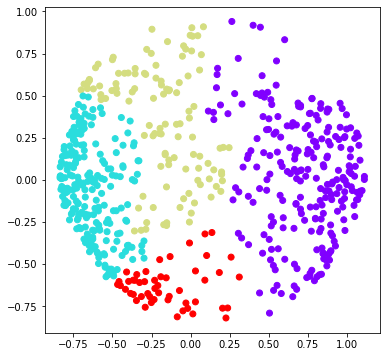

In [66]:
ac4 = AgglomerativeClustering(n_clusters = 4) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac4.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

In [67]:
k = [2, 3, 4] 
  
# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
        silhouette_score(X_principal, ac2.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac3.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac4.fit_predict(X_principal)))

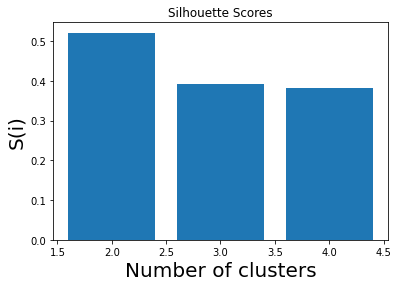

In [68]:
# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 

In [69]:
#NY FINANCE - STUFF

**Using Lazy Predict on DMV Data to find the best Models**

**Lazy Regressor**

In [70]:
#setting y variable for regression
y_reg= dmv_regression.pop('ALL_RATE')
y_reg=y_reg.astype('int')

In [71]:
#setting x variable for regression
X_reg = dmv_regression.values
X_reg.shape

(560, 18)

In [72]:
#split the data
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size= 0.3, random_state=42)

In [73]:
#initialize the lazyregressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

In [74]:
#fit the data
models, predictions = reg.fit(X_reg_train, X_reg_test, y_reg_train, y_reg_test)

100%|██████████| 42/42 [00:04<00:00,  9.69it/s]


In [75]:
#visualize the results
data=pd.DataFrame(models)
data

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.70,0.74,7.82,0.21
ExtraTreesRegressor,0.70,0.73,7.84,0.25
BaggingRegressor,0.68,0.71,8.17,0.06
RandomForestRegressor,0.66,0.69,8.43,0.50
KNeighborsRegressor,0.60,0.64,9.13,0.02
AdaBoostRegressor,0.59,0.63,9.21,0.16
XGBRegressor,0.59,0.63,9.25,0.18
TransformedTargetRegressor,0.57,0.62,9.43,0.01
LinearRegression,0.57,0.62,9.43,0.02


**Lazy Classifier**

In [76]:
#set y variable for classification
y_clf = dmv_classification.pop('Success_Rate')
y_clf=y_clf.astype('int')

In [77]:
#set x variable for classification
X_clf = dmv_classification.values

In [78]:
#split the data
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size= 0.3, random_state=42)

In [79]:
#initialize the lazyclassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)

In [80]:
#fit the data
models, predictions = clf.fit(X_clf_train, X_clf_test, y_clf_train, y_clf_test)

100%|██████████| 29/29 [00:01<00:00, 18.57it/s]


In [81]:
#visualize the results
data=pd.DataFrame(models)
data

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.97,0.96,0.96,0.97,0.04
BaggingClassifier,0.96,0.95,0.95,0.96,0.07
ExtraTreesClassifier,0.96,0.95,0.95,0.96,0.20
GaussianNB,0.89,0.94,0.94,0.90,0.02
LogisticRegression,0.96,0.93,0.93,0.97,0.05
RandomForestClassifier,0.95,0.92,0.92,0.95,0.24
LinearDiscriminantAnalysis,0.95,0.92,0.92,0.95,0.03
NearestCentroid,0.88,0.91,0.91,0.89,0.02
AdaBoostClassifier,0.96,0.90,0.90,0.96,0.20


In [82]:
#get feature names for future use
feature_names = dmv_classification.columns
print(feature_names)

Index(['TOTFRL', 'FTE', 'STUTERATIO', 'TOTMENROL', 'TOTFENROL', 'SCHOOL_TYPE',
       'ALL_COHORT', 'MAM_COHORT', 'MAS_COHORT', 'MBL_COHORT', 'MHI_COHORT',
       'MTR_COHORT', 'MWH_COHORT', 'PPCSTOT', 'MATH_NUM', 'MATH_PCT',
       'READ_NUM', 'READ_PCT'],
      dtype='object')


**DMV Regression**

**GradientBoosting Regressor**

In [83]:
#set a and y to regressor variables
y = y_reg
X = X_reg 

In [84]:
#split the data and assign parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,}


In [85]:
#initialize, fit and predict 
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

pred = reg.predict(X_test)

In [86]:
#get score for train data
reg.score(X_train, y_train)

0.9633464966618498

In [87]:
#get score for test data
reg.score(X_test, y_test)

0.6960370710772457

Since the score is better for training than testing, the model is overfitting. It can be improved with cross validation or regularization.

**DMV Classification**

**LinearSVC**

In [88]:
#set x and y to classification variables
y = y_clf
X = X_clf

In [89]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [90]:
#initialize, fit and predict
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

#generate classification report
print("Classification Report:\n", classification_report(y_test, pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       0.99      0.97      0.98       150

    accuracy                           0.97       168
   macro avg       0.90      0.96      0.93       168
weighted avg       0.97      0.97      0.97       168



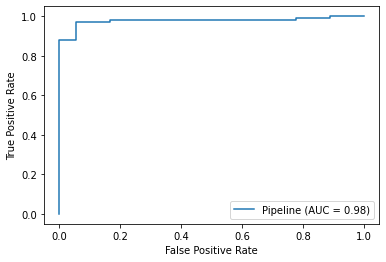

In [91]:
#generate ROC curve
metrics.plot_roc_curve(clf, X_test, y_test) 

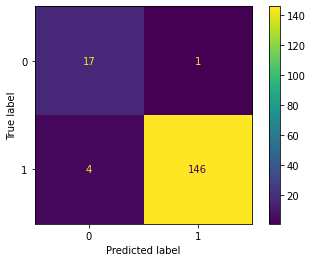

In [92]:
#plot confusion matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

**Random Forest**

In [93]:
#initialize, fit and predict
clf = RandomForestClassifier(n_estimators=500, n_jobs=4)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [94]:
print("Classification Report:\n", classification_report(y_test, pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.83      0.75        18
           1       0.98      0.95      0.97       150

    accuracy                           0.94       168
   macro avg       0.83      0.89      0.86       168
weighted avg       0.95      0.94      0.94       168



In [95]:
print(accuracy_score(y_test, pred))

0.9404761904761905


Random forest accuracy score is better for NY compared to DMV

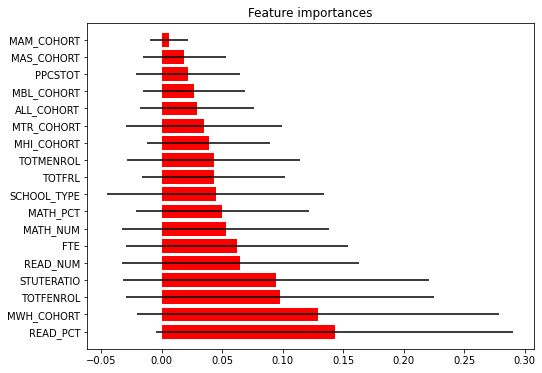

In [96]:
#get feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)

plt.figure(figsize =(8,6))
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")

plt.yticks(range(X.shape[1]), [feature_names[i] for i in indices])
plt.ylim([-1, X.shape[1]])
plt.show()

**Logistic Regression**

In [97]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
pred = grid_result.predict(X_test)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.971111 using {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.955791 (0.024630) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.969402 (0.022249) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.959167 (0.024405) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.954936 (0.026149) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.963440 (0.026922) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.958333 (0.023310) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.959188 (0.026897) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.966004 (0.023090) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.961752 (0.024442) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.965150 (0.025097) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.962585 (0.026143) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.966859 (0.025660) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.969423 (0.021195) with: 

In [98]:
print('Classification Report: \n',classification_report(y_test, pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.72      0.70        18
           1       0.97      0.96      0.96       150

    accuracy                           0.93       168
   macro avg       0.83      0.84      0.83       168
weighted avg       0.94      0.93      0.94       168



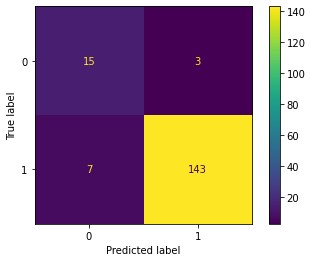

In [99]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

**Lasso and Ridge**

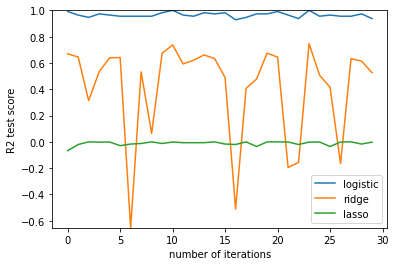

In [100]:
#create function for lasso, ridge and logistic regression
def model_experiment(num_iter = 5, 
                     models = ['logistic', 'ridge', 'lasso'], alpha= 10, 
                     complexity = 'simple', degree = 3):
    
    x_axis = np.arange(num_iter)
    y_logistic_test = []
    y_lasso_test = []
    y_ridge_test = []
    sample_models = {}
    for i in range(num_iter):        
        if complexity == 'simple':
            ## split train_test 
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        elif complexity == 'polynomial':
            ## Create higher order terms
            poly = PolynomialFeatures(degree=degree)
            Xp = poly.fit_transform(X)
            ## test-train split
            X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size = 0.2)

        ## Standard scale mean = 0, variance = 1
        sd = StandardScaler()
        sd.fit(X_train)
        X_train = sd.transform(X_train)
        X_test = sd.transform(X_test)

        ## Vanilla model
        if 'logistic' in models:
            logistic = LogisticRegression()
            logistic.fit(X_train, y_train)    
            sample_models['logistic'] = logistic
            test_score = logistic.score(X_test, y_test)
            train_score = logistic.score(X_train, y_train)
            y_logistic_test.append(test_score)

        if 'ridge' in models:
            ## Ridge in the simple setting
            ridge = Ridge(alpha = alpha, max_iter= 10000)
            ridge.fit(X_train, y_train)
            sample_models['ridge'] = ridge
            y_ridge_test.append(ridge.score(X_test, y_test))

        if 'lasso' in models:
            ## Lasso in the simple setting
            lasso = Lasso(alpha = alpha, max_iter= 10000)
            lasso.fit(X_train, y_train)           
            sample_models['lasso'] = lasso           
            y_lasso_test.append(lasso.score(X_test, y_test))                                                       

        i+=1
    if 'logistic' in models:
        plt.plot(y_logistic_test, label = 'logistic')
    if 'ridge' in models:
        plt.plot(y_ridge_test, label = 'ridge')
    if 'lasso' in models:
        plt.plot(y_lasso_test, label = 'lasso')
    plt.ylabel('R2 test score')
    plt.xlabel('number of iterations')
    all_results = y_logistic_test + y_lasso_test + y_ridge_test
    plt.ylim((np.min(all_results), np.max(all_results)))
    
    plt.legend()
    return sample_models

trained_models = model_experiment(num_iter=30, alpha = 15,
                                   models = ['logistic', 'ridge', 'lasso'], 
                                   complexity= 'polynomial', degree = 2)

**Neural Networks**

In [101]:
#scale the data
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [102]:
# Create the Neural Network
def create_model(learning_rate, dropout_rate): 
  model = Sequential() 
  model.add(Dense(12, input_dim=X_train.shape[1], activation='relu')) 
  model.add(Dropout(dropout_rate)) 
  model.add(Dense(6, activation='relu')) 
  model.add(Dropout(dropout_rate)) 
  model.add(Dense(1, activation='sigmoid')) 
  adam = Adam(lr=learning_rate) 
  model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
  return model

In [103]:
dropout_rate = 0.1 
epochs = 50 
batch_size = 1 
learn_rate = 0.001

In [104]:
model = create_model(learn_rate, dropout_rate) 

In [105]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

Epoch 1/50
313/313 [==============================] - 1s 3ms/step - loss: 0.5661 - accuracy: 0.7796 - val_loss: 0.2964 - val_accuracy: 0.9114
Epoch 2/50
313/313 [==============================] - 1s 2ms/step - loss: 0.2459 - accuracy: 0.9329 - val_loss: 0.1488 - val_accuracy: 0.9747
Epoch 3/50
313/313 [==============================] - 1s 2ms/step - loss: 0.1894 - accuracy: 0.9233 - val_loss: 0.1430 - val_accuracy: 0.9747
Epoch 4/50
313/313 [==============================] - 1s 2ms/step - loss: 0.1717 - accuracy: 0.9233 - val_loss: 0.1072 - val_accuracy: 0.9873
Epoch 5/50
313/313 [==============================] - 1s 2ms/step - loss: 0.1702 - accuracy: 0.9425 - val_loss: 0.1319 - val_accuracy: 0.9620
Epoch 6/50
313/313 [==============================] - 1s 2ms/step - loss: 0.1431 - accuracy: 0.9521 - val_loss: 0.1132 - val_accuracy: 0.9747
Epoch 7/50
313/313 [==============================] - 1s 2ms/step - loss: 0.1293 - accuracy: 0.9649 - val_loss: 0.0899 - val_accuracy: 0.9873
Epoch 

In [106]:
accuracies = model.evaluate(X_test, y_test, verbose=1) 
print('Test Score:', accuracies[0]) 
print('Test Accuracy:', accuracies[1])

6/6 [==============================] - 0s 3ms/step - loss: 0.1212 - accuracy: 0.9464
Test Score: 0.12124363332986832
Test Accuracy: 0.9464285969734192


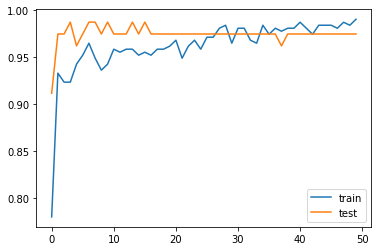

In [107]:
plt.plot(model_history.history['accuracy'], label = 'accuracy') 
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy') 
plt.legend(['train', 'test'])

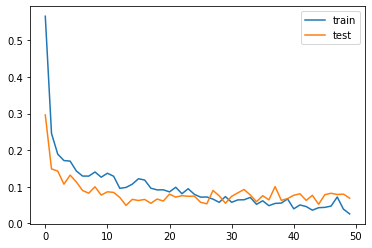

In [108]:
plt.plot(model_history.history['loss'], label = 'loss') 
plt.plot(model_history.history['val_loss'], label = 'val_loss') 
plt.legend(['train','test'])

**Unsupervised Learning** Clustering for DMV

In [109]:
# Scaling the data so that all the features become comparable 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

In [110]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

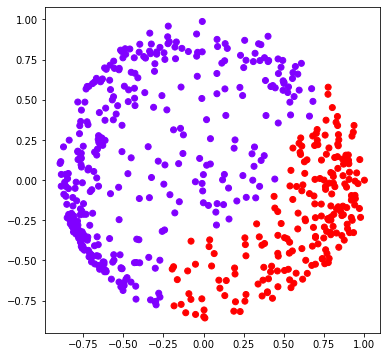

In [111]:
ac2 = AgglomerativeClustering(n_clusters = 2) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = ac2.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

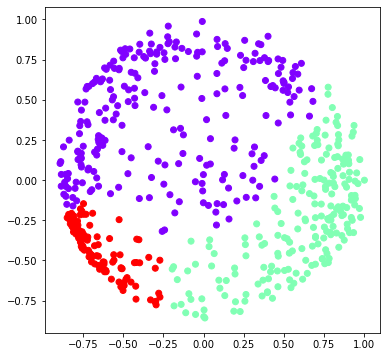

In [112]:
ac3 = AgglomerativeClustering(n_clusters = 3) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac3.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

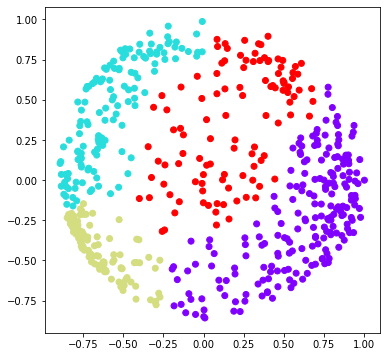

In [113]:
ac4 = AgglomerativeClustering(n_clusters = 4) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac4.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

In [114]:
k = [2, 3, 4] 
  
# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
        silhouette_score(X_principal, ac2.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac3.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac4.fit_predict(X_principal)))

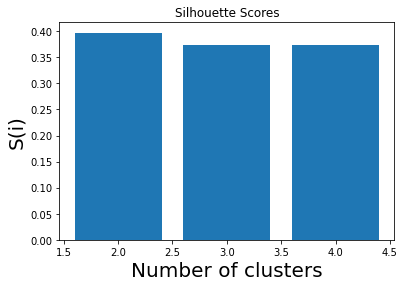

In [115]:
# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 